In [1]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

     |████████████████████████████████| 11.7 MB 7.4 MB/s eta 0:00:01     |█████████████████████████████▏  | 10.6 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 4.3 MB/s eta 0:00:01    |███▋                            | 1.9 MB 2.8 MB/s eta 0:00:06
     |████████████████████████████████| 503 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 497.6 MB 4.7 kB/s  eta 0:00:01  |▏                               | 2.9 MB 2.3 MB/s eta 0:03:35     |█                               | 14.9 MB 8.2 MB/s eta 0:00:59     |██▋                             | 39.9 MB 2.6 MB/s eta 0:02:54     |███▊                            | 58.1 MB 5.0 MB/s eta 0:01:29     |████▏                           | 64.4 MB 4.8 MB/s eta 0:01:32     |████▋                           | 71.5 MB 3.4 MB/s eta 0:02:07     |██████▏                         | 95.1 MB 3.4 MB/s eta 0:02:00     |██████████                      | 156.0 MB 3.1 MB/s eta 0:01:50     |███████████▍                    | 177.4 MB 

     |████████████████████████████████| 77 kB 781 kB/s  eta 0:00:01
     |████████████████████████████████| 61 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 138 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 10.2 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=7955ebba45835b42708df386c1fde420c983de9abbbbcddca6d595a51daf042f
  Stored in directory: /home/danish/.cache/pip/wheels/b6/0d/90/0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
     |████████████████████████████████| 26.4 MB 3.9 MB/s eta 0:00:01     |█████████████████████████████▋  | 24.5 MB 3.5 MB/s eta 0:00:01     |███████████████████████████████▎| 25.9 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 42.1 MB 3.9 MB/s eta 0:00:01    |████                            | 5.3 MB 7.3 MB/s eta 0:00:06     |████████▏                       | 10.8 MB 1.8 MB/s eta 0:00:18     |██████████████  

In [48]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
rca_data = pd.read_csv('root_cause_analysis.csv')

rca_data.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [50]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
rca_data['ROOT_CAUSE'] = label_encoder.fit_transform(rca_data['ROOT_CAUSE'])

In [51]:
rca_data.head()


,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,1
1,2,0,0,0,0,0,0,1,1
2,3,0,1,1,0,0,1,1,1
3,4,0,1,0,1,1,0,1,1
4,5,1,1,0,1,0,1,0,2


In [52]:
rca_np = rca_data.to_numpy()

In [53]:
rca_np

array([[   1,    0,    0, ...,    0,    1,    1],
       [   2,    0,    0, ...,    0,    1,    1],
       [   3,    0,    1, ...,    1,    1,    1],
       ...,
       [ 998,    1,    1, ...,    0,    0,    1],
       [ 999,    0,    1, ...,    0,    0,    2],
       [1000,    1,    0, ...,    1,    0,    0]])

In [54]:
rca_np.shape

(1000, 9)

In [55]:
x_data = rca_np[:,1:8]
y_data = rca_np[:, 8]

In [56]:
print("\nFeatures before scaling :\n------------------------------------")
print(x_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(y_data[:5])


Features before scaling :
------------------------------------
[[0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1]
 [0 1 1 0 0 1 1]
 [0 1 0 1 1 0 1]
 [1 1 0 1 0 1 0]]

Target before scaling :
------------------------------------
[1 1 1 1 2]


In [14]:
#scaler = StandardScaler().fit_transform(x_data)


In [15]:
#scaler

array([[-0.94548368, -0.84747452, -0.80632811, ...,  1.03046381,
        -0.87210285,  1.27462619],
       [-0.94548368, -0.84747452, -0.80632811, ..., -0.97043679,
        -0.87210285,  1.27462619],
       [-0.94548368,  1.17997648,  1.24018993, ..., -0.97043679,
         1.14665375,  1.27462619],
       ...,
       [ 1.05765971,  1.17997648,  1.24018993, ..., -0.97043679,
        -0.87210285, -0.78454374],
       [-0.94548368,  1.17997648,  1.24018993, ...,  1.03046381,
        -0.87210285, -0.78454374],
       [ 1.05765971, -0.84747452, -0.80632811, ...,  1.03046381,
         1.14665375, -0.78454374]])

In [19]:
#x_data = scaler

In [57]:
x_data

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0]])

In [58]:
y_data = tf.keras.utils.to_categorical(y_data,3)

In [59]:
pd.unique(rca_np[:,8])

array([1, 2, 0])

In [60]:
print("\nFeatures after scaling :\n------------------------------------")
print(x_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(y_data[:5,:])


Features after scaling :
------------------------------------
[[0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1]
 [0 1 1 0 0 1 1]
 [0 1 0 1 1 0 1]
 [1 1 0 1 0 1 0]]

Target after one-hot-encoding :
------------------------------------
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [61]:
x_train,x_test,y_train,y_test = train_test_split( x_data, y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


Train Test Dimensions:
------------------------------------
(900, 7) (900, 3) (100, 7) (100, 3)


In [26]:
##Create Model

In [67]:
from tensorflow import keras


NB_CLASSES = 3


model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(128,
                            input_shape=(7,),
                            name='Hidden-layer-1',
                            activation='relu'))

model.add(keras.layers.Dense(128,
                           name='hidden-layer-2',
                           activation='relu'))

model.add(keras.layers.Dense(128,
                           name='hidden-layer-3',
                           activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                            name='output_layer',
                            activation='softmax'))

model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-layer-1 (Dense)      (None, 128)               1024      
                                                                 
 hidden-layer-2 (Dense)      (None, 128)               16512     
                                                                 
 hidden-layer-3 (Dense)      (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 34,435
Trainable params: 34,435
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
12/12 [==============================] - 1s 18ms/step - loss: 0.8365 - accuracy: 0.7222 - val_loss: 0.5926 - val_accuracy: 0.7944
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.5209 - accuracy: 0.8167 - val_loss: 0.4706 - val_accuracy: 0.8444
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.4626 - accuracy: 0.8264 - val_loss: 0.4573 - val_accuracy: 0.8444
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.4372 - accuracy: 0.8472 - val_loss: 0.4039 - val_accuracy: 0.8444
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.4313 - accuracy: 0.8403 - val_loss: 0.4063 - val_accuracy: 0.8278
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.8417 - val_loss: 0.4525 - val_accuracy: 0.8278
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.4078 - accuracy: 0.8458 - val_loss: 0.4364 - val_accuracy: 0.8278
Epoch 8/20
12/12 [=

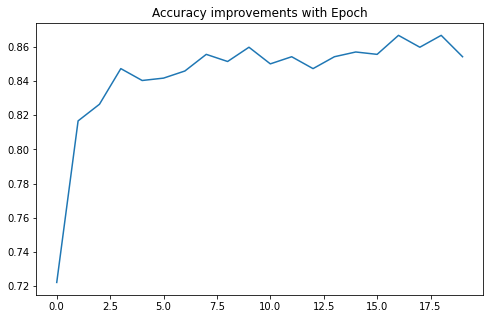


Evaluation against Test Dataset :
------------------------------------
4/4 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8000


[0.5698282718658447, 0.800000011920929]

In [68]:
v = 1

bs = 64
e = 20
vs = 0.2

history = model.fit(x_train,
                   y_train,
                   batch_size=bs,
                   epochs=e,
                   validation_split=vs,
                   verbose=v)


print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
#plt.title()

plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)

In [70]:
pre_in = [[1,0,0,0,1,1,0]]

raw_prediction = model.predict(pre_in)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


Raw Prediction Output (Probabilities) : [[0.84203804 0.15388961 0.00407233]]
Prediction is  ['DATABASE_ISSUE']
